In [90]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(dpi=1200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

<Figure size 7200x4800 with 0 Axes>

In [2]:
#import the dataset with pandas
df = pd.read_excel('C:/Users/maxil/Desktop/team-tidy/salary/salary_data_states.xlsx')

In [17]:
#clean the dataset, removing unnecessary columns
salary = df.drop(columns=['PREVAILING_WAGE_SUBMITTED', 'PREVAILING_WAGE_SUBMITTED_UNIT', 'PAID_WAGE_SUBMITTED', 'PAID_WAGE_SUBMITTED_UNIT'])

In [18]:
#clean the dataset, remove nas
salary['EDUCATION_LEVEL_REQUIRED'] = salary['EDUCATION_LEVEL_REQUIRED'].fillna("Nothing")
salary['COLLEGE_MAJOR_REQUIRED'] = salary['COLLEGE_MAJOR_REQUIRED'].fillna("Nothing")
salary['EXPERIENCE_REQUIRED_Y_N'] = salary['EXPERIENCE_REQUIRED_Y_N'].fillna("n")
salary['EXPERIENCE_REQUIRED_NUM_MONTHS'] = salary['EXPERIENCE_REQUIRED_NUM_MONTHS'].fillna(0)
salary['COUNTRY_OF_CITIZENSHIP'] = salary['COUNTRY_OF_CITIZENSHIP'].fillna("Unknown")
salary['WORK_POSTAL_CODE'] = salary['WORK_POSTAL_CODE'].fillna("Unknown")
salary['FULL_TIME_POSITION_Y_N'] = salary['FULL_TIME_POSITION_Y_N'].fillna("n")
salary['PREVAILING_WAGE_PER_YEAR'] = salary['PREVAILING_WAGE_PER_YEAR'].fillna(0)
salary['WORK_CITY'] = salary['WORK_CITY'].fillna("Unknown")

In [24]:
salary.describe()

,EXPERIENCE_REQUIRED_NUM_MONTHS,PREVAILING_WAGE_PER_YEAR,PAID_WAGE_PER_YEAR,order
count,167278.00,167278.00,167278.00,167278.00
mean,1.03,74244.67,85532.77,83714.72
std,7.03,25395.27,38738.47,48300.24
min,0.00,0.00,10500.00,1.00
25%,0.00,56826.00,63000.00,41901.25
50%,0.00,70928.00,78600.00,83722.50
75%,0.00,90459.00,100006.00,125541.75
max,144.00,320000.00,2500000.00,167361.00


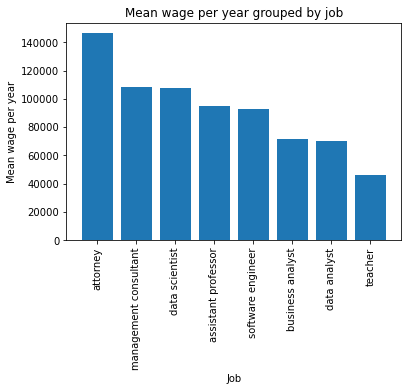

In [94]:
#mean paid wage per year grouped by JOB_TITLE_SUBGROUP
dfg = pd.DataFrame(salary.groupby(['JOB_TITLE_SUBGROUP'])['PAID_WAGE_PER_YEAR'].mean()).reset_index()
dfg = dfg.sort_values('PAID_WAGE_PER_YEAR',ascending=False)
plt.bar(x='JOB_TITLE_SUBGROUP', height='PAID_WAGE_PER_YEAR', data=dfg)
plt.xticks(rotation=90)
plt.title('Mean wage per year grouped by job')
plt.xlabel('Job')
plt.ylabel('Mean wage per year')
plt.savefig('wage_job.png', bbox_inches='tight', dpi=1200)